In this kernel,
Let's analyze the data, find some insights. Let's see which countries have increasing suicide rates and decreasing suicide rates. Which Countries should be careful?

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['master.csv']


In [2]:
df = pd.read_csv("../input/master.csv")

Let's see sample data

In [3]:
df.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Are there any Nan Values???

In [4]:
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

HDI for Year has Nan values, But I am not considering that column,
* So let me take columns which I analyze.

"Suicides/100k pop" is correct for analyzing as it depicts,
**"how many suicides occured for 100000 population?"**

In [5]:
first_obs = df[["country","year","sex","age","suicides/100k pop"]]

In [6]:
first_obs.head()

,country,year,sex,age,suicides/100k pop
0,Albania,1987,male,15-24 years,6.71
1,Albania,1987,male,35-54 years,5.19
2,Albania,1987,female,15-24 years,4.83
3,Albania,1987,male,75+ years,4.59
4,Albania,1987,male,25-34 years,3.28


**Modifying the "year" attribute**

In [7]:
print("Min : ",first_obs.year.min())
print("Max : ",first_obs.year.max())

Min :  1985
Max :  2016


In [8]:
len(first_obs.year.unique())

32

I would like to analyze based on decades, so I would like to modify the year group as below.

In [9]:
def decade_mapping(data):
    if 1987<= data <= 1996:
        return "1987-1996"
    elif 1997<= data <= 2006:
        return "1997-2006"
    else:
        return "2007-2016"
first_obs.year = first_obs.year.apply(decade_mapping)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [10]:
first_obs.sample()

,country,year,sex,age,suicides/100k pop
20366,Republic of Korea,1987-1996,male,25-34 years,19.35


**Let's start finding insights and see some visualizations**

1. Suicides based on Age, Gender

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

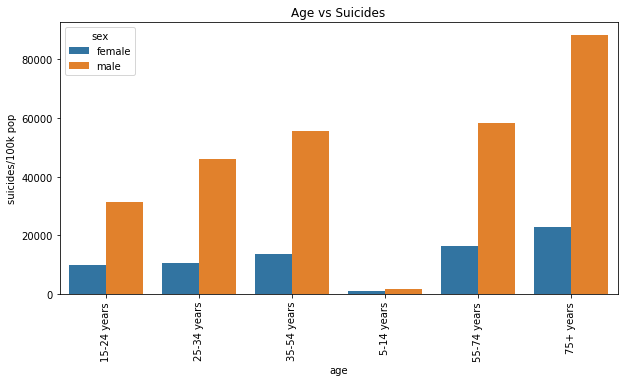

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x = "age", y = "suicides/100k pop", hue = "sex",data = first_obs.groupby(["age","sex"]).sum().reset_index()).set_title("Age vs Suicides")
plt.xticks(rotation = 90)

As you see, as the age increases, suicide rates is increasing irrespective of Gender

In [12]:
first_obs.groupby(["year","sex"]).sum().reset_index()

,year,sex,suicides/100k pop
0,1987-1996,female,23483.82
1,1987-1996,male,81376.54
2,1997-2006,female,27593.97
3,1997-2006,male,108280.25
4,2007-2016,female,23936.98
5,2007-2016,male,91872.27


2. Suicides based on Decades, Gender

Text(0.5, 1.0, 'Decades vs Suicides')

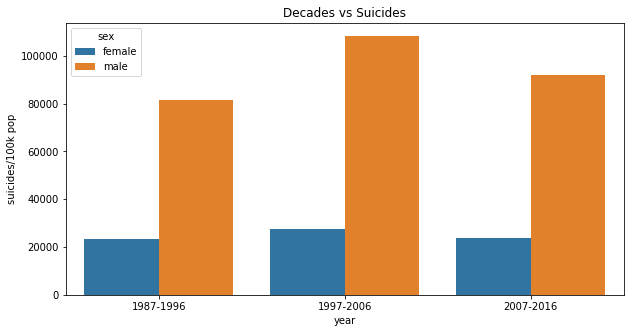

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(x = "year", y = "suicides/100k pop", hue = "sex",data = first_obs.groupby(["year","sex"]).sum().reset_index()).set_title("Decades vs Suicides")

"1997 - 2006" decade has seen more deaths(suicides)

Text(0.5, 1.0, 'Gender wise Suicides')

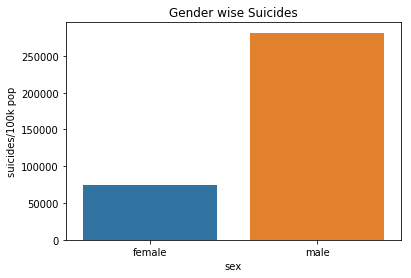

In [14]:
sns.barplot(x = "sex", y = "suicides/100k pop", data = first_obs.groupby("sex").sum().reset_index()).set_title("Gender wise Suicides")

As you see, male suicides are higher than female suicides

**Country wise Suicide Analysis**

In [15]:
country_sucides = first_obs.groupby("country").sum().reset_index()
country_sucides.head()

,country,suicides/100k pop
0,Albania,924.76
1,Antigua and Barbuda,179.14
2,Argentina,3894.59
3,Armenia,976.21
4,Aruba,1596.52


**Which countries have less suicides?**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

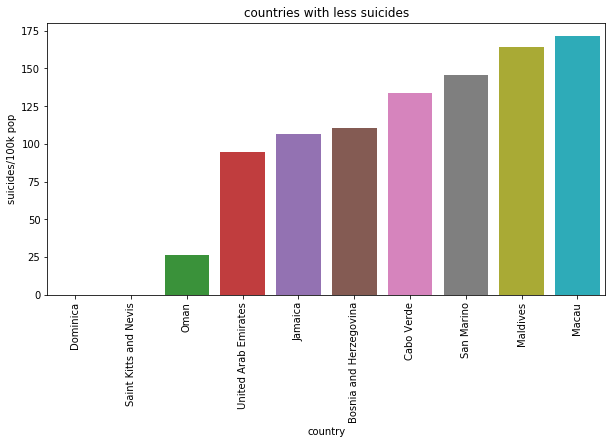

In [16]:
plt.figure(figsize=(10,5))
best_10 = country_sucides.sort_values(by = "suicides/100k pop",ascending= True)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = best_10).set_title("countries with less suicides")
plt.xticks(rotation = 90)

**10 countries with most suicides**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

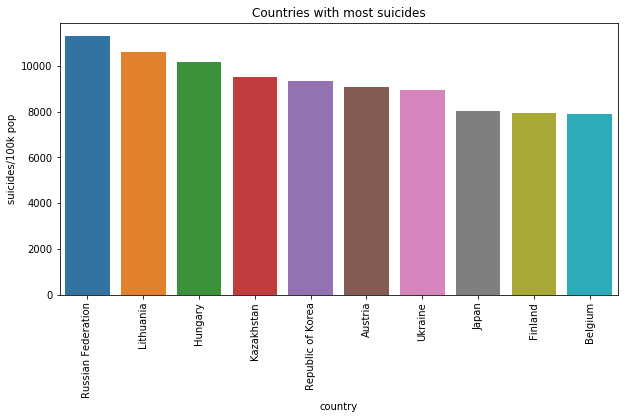

In [17]:
plt.figure(figsize=(10,5))
best_10 = country_sucides.sort_values(by = "suicides/100k pop",ascending= False)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = best_10).set_title("Countries with most suicides")
plt.xticks(rotation = 90)

**Which countries have most/less suicides recently????**

In [18]:
recent = first_obs[first_obs.year =="2007-2016"].groupby("country").sum().reset_index()
recent.head()

,country,suicides/100k pop
0,Albania,178.56
1,Antigua and Barbuda,23.60
2,Argentina,1294.98
3,Armenia,378.16
4,Aruba,327.93


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

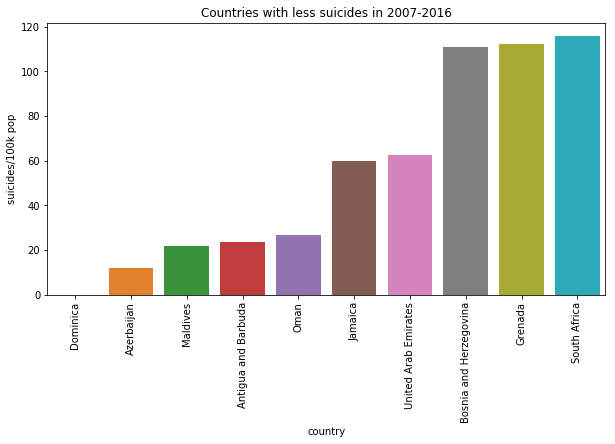

In [19]:
plt.figure(figsize=(10,5))
recent_best_10 = recent.sort_values(by = "suicides/100k pop")[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = recent_best_10).set_title("Countries with less suicides in 2007-2016")
plt.xticks(rotation = 90)

**Countries with most suicides recently**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

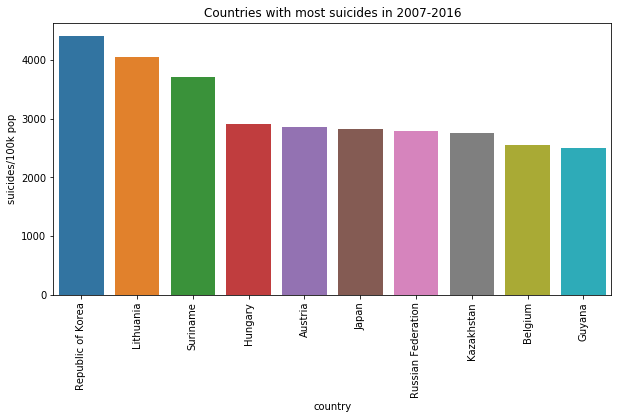

In [20]:
plt.figure(figsize=(10,5))
recent_bad_10 = recent.sort_values(by = "suicides/100k pop",ascending=False)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = recent_bad_10).set_title("Countries with most suicides in 2007-2016")
plt.xticks(rotation = 90)

**DANGER ZONE Nations vs Safe Zone Nations**

Danger Zone Nations are those nations,
* where  **suicides** are at **increasing** rate for 3 successive decades, then they are classified to **DANGER ZONE NATIONS**

Safe Zone Nations are those nations,
* where **suicides** are at **decreasing** rate for 3 successive decades, then they are classified to **Safe ZONE NATIONS**

With this analysis,
* we can understand whether GOVT taking any initiatives for decreasing suicide rate.
* Why these specfic Nations have increasing Suicide rate?


In [21]:
zone_assess = first_obs.groupby(["country","year"]).sum().reset_index()
zone_assess.head()

,country,year,suicides/100k pop
0,Albania,1987-1996,264.62
1,Albania,1997-2006,481.58
2,Albania,2007-2016,178.56
3,Antigua and Barbuda,1987-1996,32.24
4,Antigua and Barbuda,1997-2006,123.30


In [22]:
#countries having data of three decades
three_gen = zone_assess.country.value_counts().reset_index(name = "count")
three_gen.columns = ["country", "counts"]
three_gen_countries = three_gen[three_gen.counts == 3].country.tolist()

In [23]:
nations = three_gen_countries
years = zone_assess.year.unique()
green_zones = []
danger_zones = []
for country in nations:
    s_year1 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year == "1987-1996")]["suicides/100k pop"])
    s_year2 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year == "1997-2006")]["suicides/100k pop"])
    s_year3 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year == "2007-2016")]["suicides/100k pop"])
    if s_year1 <= s_year2 <= s_year3:
        danger_zones.append(country)
    if s_year1 >= s_year2 >= s_year3:
        green_zones.append(country)
        

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

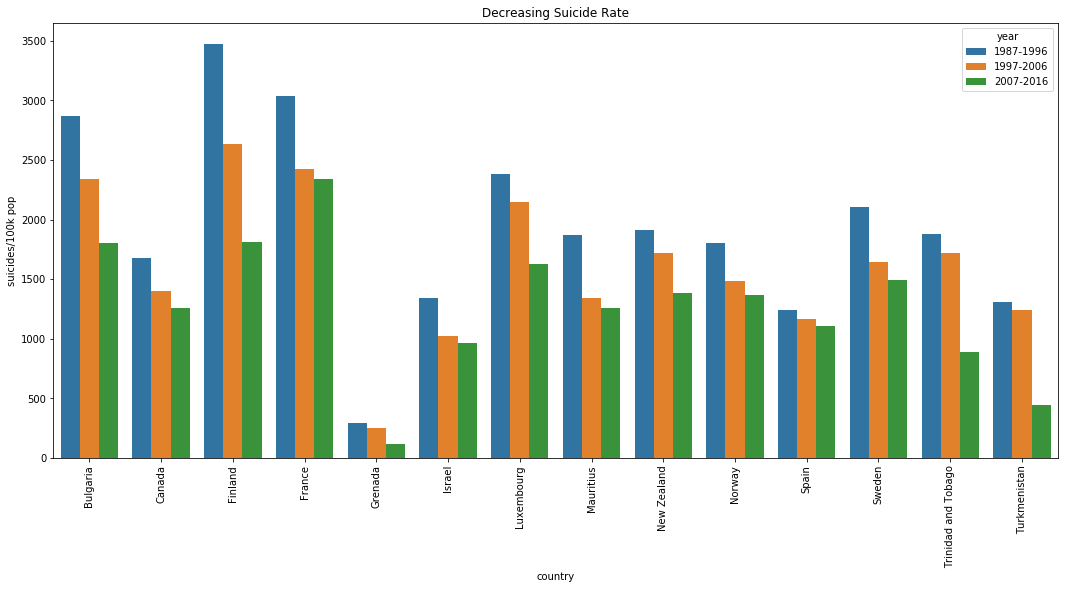

In [24]:
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides/100k pop", hue = "year",data = zone_assess[zone_assess.country.isin(green_zones)]).set_title("Decreasing Suicide Rate")
plt.xticks(rotation = 90)

Suicides are decreasing in above nations.This is a good sign.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

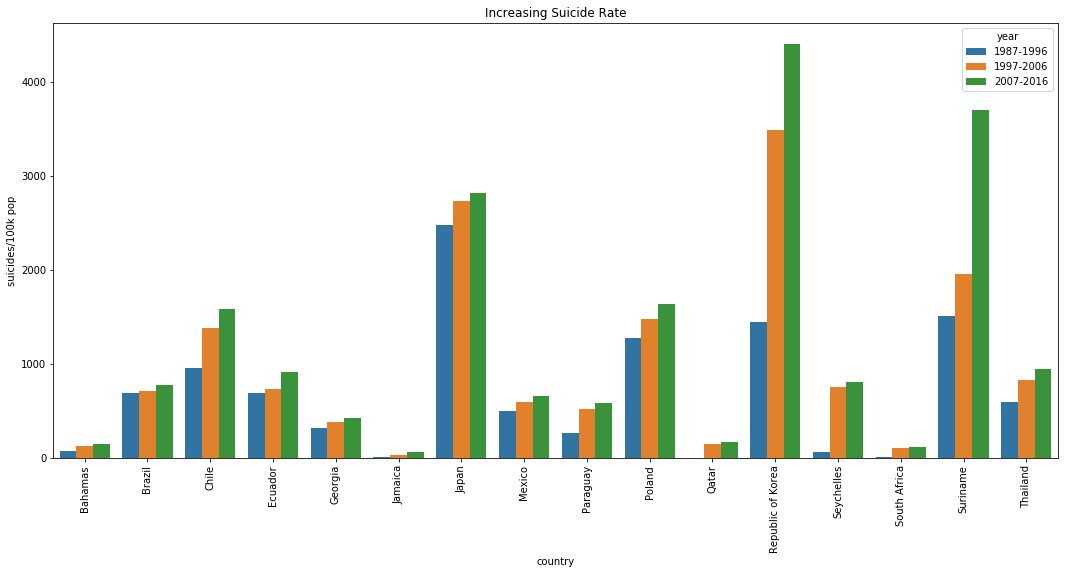

In [25]:
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides/100k pop", hue = "year",data = zone_assess[zone_assess.country.isin(danger_zones)]).set_title("Increasing Suicide Rate")
plt.xticks(rotation = 90)

Suicides are increasing in above nations.Especially, Republic of Korea and Suriname countries have a greater suicide increasing rate.

I'm a beginner. Give suggesstions for any improvements in kernel.